# Prediction Model For Car Price

### Import Python Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('Current Dataset.csv',encoding='ANSI')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type,transmission
0,7 SEATER MAHINDRA BOLERO IN VERY GOOD,7,D...,Ask For Price,NaN,NaN,Manual
1,9 SEATER MAHINDRA BOL,9,Ac,Ask For Price,NaN,NaN,Automatic
2,2012 TATA SUMO GOLD F,2012,sell,"2,50,000",NaN,NaN,Manual
3,ALL PAPER UPDATED TATA INDICA V2 AND U,ALL,n...,"1,45,000",NaN,NaN,Manual
4,ANY TYPE CAR AVAIABEL HARE...COMERCICA,ANY,r...,"1,70,000",NaN,NaN,Automatic


In [4]:
car.shape

(6908, 7)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          6908 non-null   object
 1   company       6908 non-null   object
 2   year          6908 non-null   object
 3   Price         6908 non-null   object
 4   kms_driven    6856 non-null   object
 5   fuel_type     6854 non-null   object
 6   transmission  6643 non-null   object
dtypes: object(7)
memory usage: 377.9+ KB


### Creating Backup Copy 

In [6]:
backup=car.copy()

## Cleaning Data 

### Changes
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URGENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

#### year has many non-year values 

In [7]:
car = car[car['year'].astype(str).str.isnumeric()]

#### year is in object change to integer 

In [8]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price 

In [9]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object 

In [10]:
car['Price']=car['Price'].str.replace(',','').astype(int)

#### kms_driven has object values with kms at last 

In [11]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and 2 columns has "Petrol" as input  

In [12]:
car=car[car['kms_driven'].str.isnumeric()]

In [13]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values 

In [14]:
car=car[~car['fuel_type'].isna()]

#### transmission has nan values


In [15]:
car=car[~car['transmission'].isna()]

In [16]:
car.shape

(6568, 7)

### name and company had spammed data
- But with the previous cleaning, those rows got removed
- Company does not need any cleaning now and changing car names and keeping only the first three words

In [17]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data 

In [18]:
car=car.reset_index(drop=True)

## Cleaned Data 

In [45]:
car['company'].unique()

array(['AUDI', 'BMW', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCE', 'FORD',
       'HINDUSTAN', 'HONDA', 'HYUNDAI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'MAHINDRA', 'MARUTI', 'MERCEDES', 'MG', 'MINI',
       'MITSUBISHI', 'NISSAN', 'RENAULT', 'SKODA', 'SSANGYONG', 'TATA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

### Dataset was of 992 rows has been cleaned and removed all unnecessary input and it is reduced to 916 rows(datas)

#### Making dataset of car into CSV files 

In [20]:
car.to_csv('Cleaned_Car_data.csv')

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          6568 non-null   object
 1   company       6568 non-null   object
 2   year          6568 non-null   int32 
 3   Price         6568 non-null   int32 
 4   kms_driven    6568 non-null   int32 
 5   fuel_type     6568 non-null   object
 6   transmission  6568 non-null   object
dtypes: int32(3), object(4)
memory usage: 282.3+ KB


In [22]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,transmission
count,6568,6568,6568.000000,6.568000e+03,6568.000000,6568,6568
unique,955,29,NaN,NaN,NaN,5,2
top,MARUTI WAGON R,MARUTI,NaN,NaN,NaN,Petrol,Manual
freq,268,2978,NaN,NaN,NaN,4103,5532
mean,NaN,NaN,2014.285323,5.130108e+05,59060.006547,NaN,NaN
std,NaN,NaN,3.178687,3.659822e+05,41691.377964,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN,NaN
25%,NaN,NaN,2012.000000,3.089990e+05,30517.750000,NaN,NaN
50%,NaN,NaN,2014.000000,4.205490e+05,51045.500000,NaN,NaN
75%,NaN,NaN,2017.000000,6.036990e+05,79367.500000,NaN,NaN


In [23]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price 

In [24]:
car['company'].unique()

array(['AUDI', 'BMW', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCE', 'FORD',
       'HINDUSTAN', 'HONDA', 'HYUNDAI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'MAHINDRA', 'MARUTI', 'MERCEDES', 'MG', 'MINI',
       'MITSUBISHI', 'NISSAN', 'RENAULT', 'SKODA', 'SSANGYONG', 'TATA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [25]:
import seaborn as sns

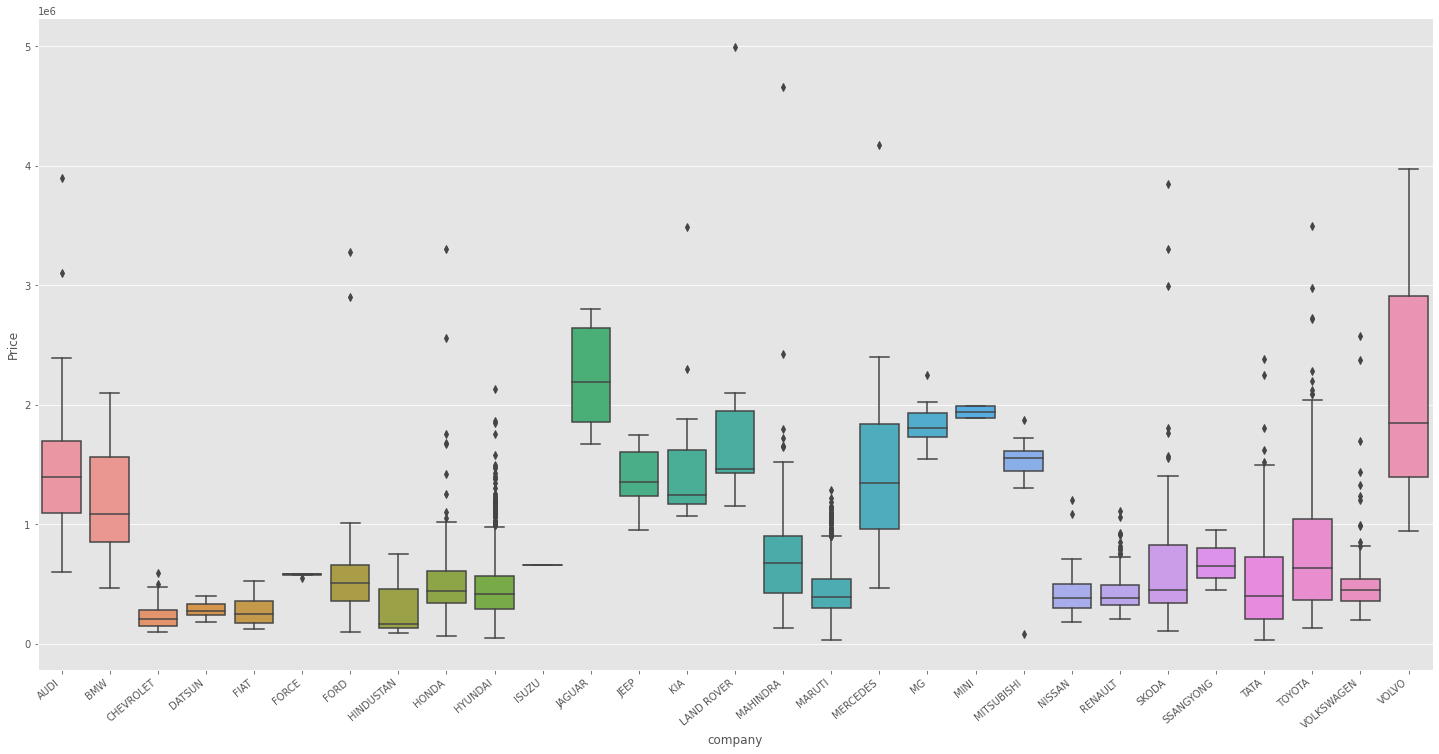

In [26]:
plt.subplots(figsize=(25,12))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price 

c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

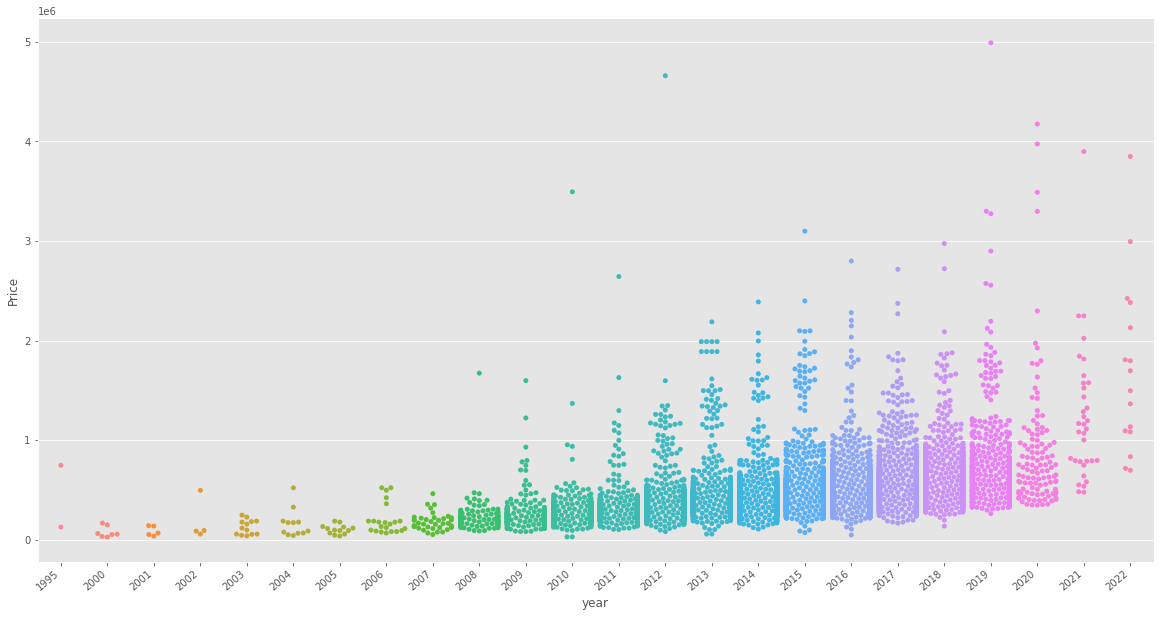

In [27]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price 

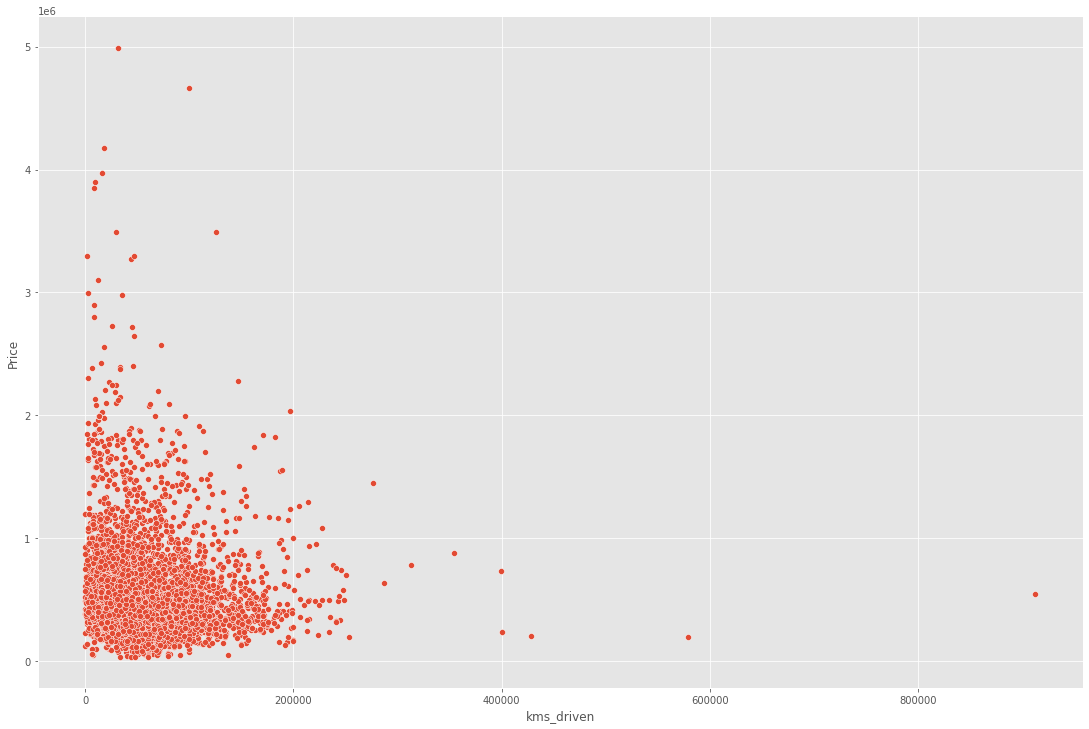

In [28]:
sns.relplot(x='kms_driven',y='Price',data=car,height=10,aspect=1.5)

### Checking relationship of Fuel Type with Price 

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

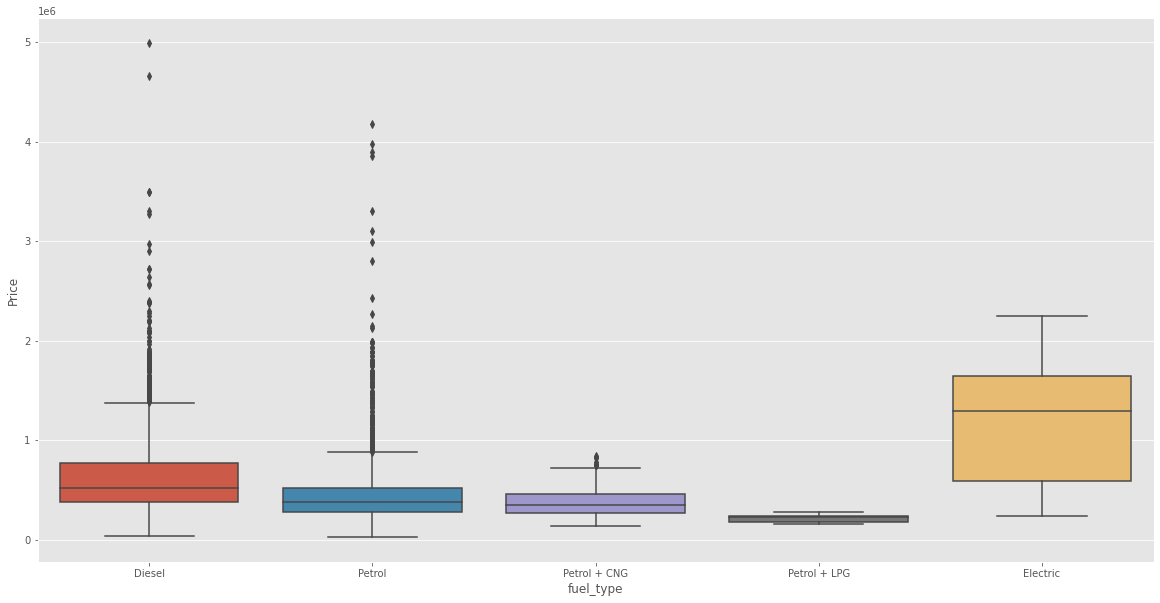

In [29]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed 

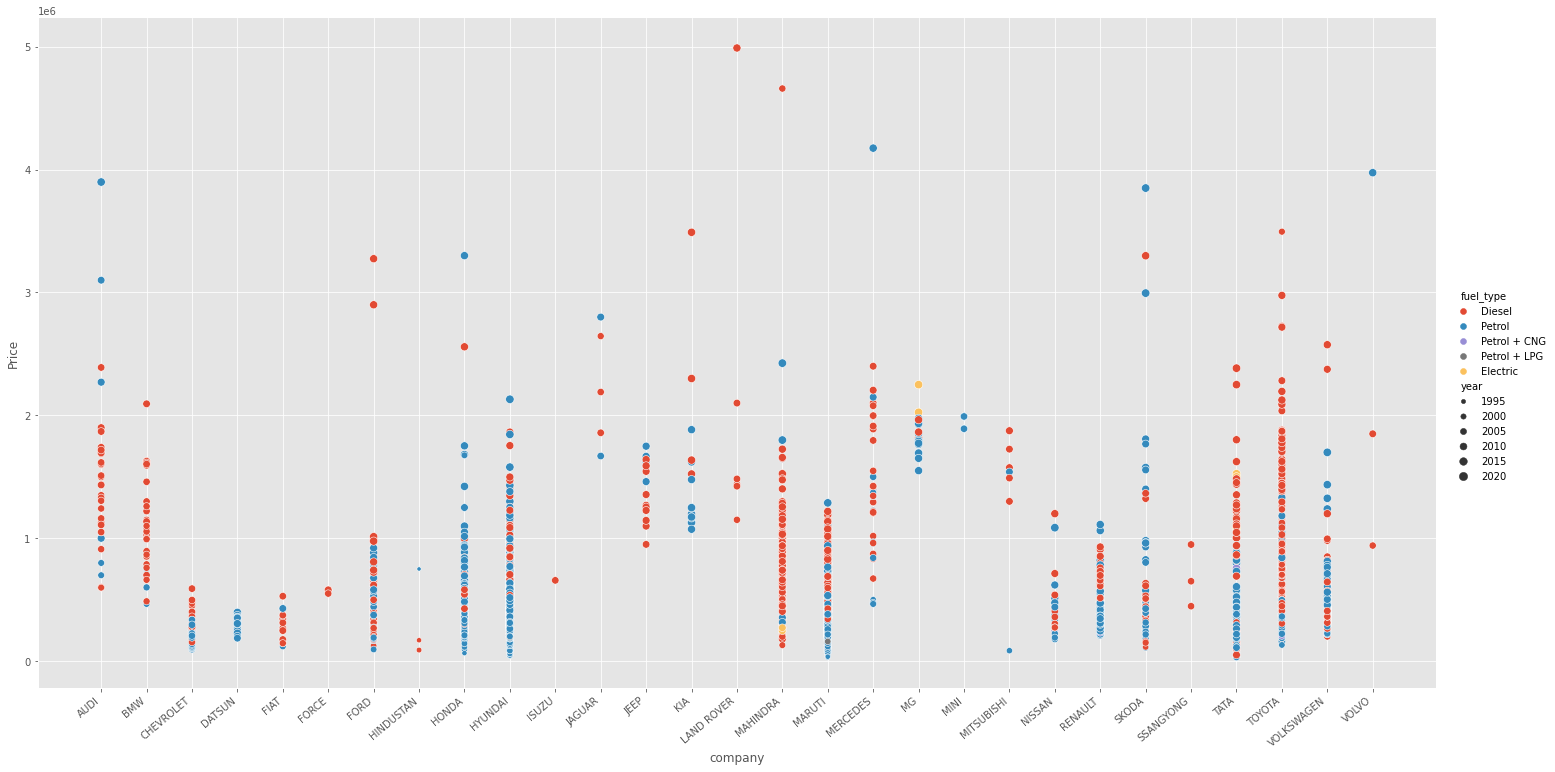

In [30]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=10,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data 
- Divide data into 2 parts
- X = name, company, year, kms_driven, fuel_type
- y = Price

In [31]:
X=car[['name','company','year','kms_driven','fuel_type','transmission']]
y=car['Price']

In [32]:
X

,name,company,year,kms_driven,fuel_type,transmission
0,AUDI Q7,AUDI,2014,16934,Diesel,Automatic
1,AUDI A4 1.8,AUDI,2009,47000,Petrol,Automatic
2,AUDI Q3 2.0,AUDI,2013,37000,Diesel,Automatic
3,AUDI A4 2.0,AUDI,2013,27000,Diesel,Automatic
4,AUDI A3 CABRIOLET,AUDI,2015,12516,Petrol,Automatic
...,...,...,...,...,...,...
6563,VOLKSWAGEN POLOCOMFORTLINE 1.0,VOLKSWAGEN,2018,21823,Petrol,Manual
6564,VOLKSWAGEN POLOTRENDLINE 1.5L,VOLKSWAGEN,2014,87035,Diesel,Manual
6565,VOLVO XC40,VOLVO,2020,16500,Petrol,Automatic
6566,VOLVO S80 SUMMUM,VOLVO,2015,42000,Diesel,Manual


In [33]:
y

0        600000
1        799000
2       1499000
3       1510000
4       3100000
         ...   
6563     561099
6564     407999
6565    3975000
6566    1850000
6567     940499
Name: Price, Length: 6567, dtype: int32

### Applying Train Test Split 

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories 

In [37]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','transmission']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [38]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','transmission']),
                                    remainder='passthrough')

### Linear Regression Model 

In [39]:
lr=LinearRegression()

#### Making a Pipeline 

In [40]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the model 

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AUDI A3 CABRIOLET', 'AUDI A335TDI', 'AUDI A4 1.8', 'AUDI A4 2.0',
       'AUDI A42.0 TDI', 'AUDI A435 TDI', 'AUDI A6 2.0', 'AUDI A62.0 TDI',
       'AUDI A62.7 TDI', 'AUDI A8', 'AUDI Q2 PREMIUM', 'AUDI Q3 2.0',
       'AUDI Q32.0 TDI', 'AUDI Q330 TDI', 'AUDI Q330 TFSI'...
       'LAND ROVER', 'MAHINDRA', 'MARUTI', 'MERCEDES', 'MG', 'MINI',
       'MITSUBISHI', 'NISSAN', 'RENAULT', 'SKODA', 'SSANGYONG', 'TATA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object),
                                                                            array(['Diesel', 'Electric', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'],
      dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype

In [42]:
y_pred=pipe.predict(X_test)

#### Checking R2 score (Accuracy) 

In [43]:
r2_score(y_test,y_pred)

0.7637461945854436

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.90 as R2 score 

In [46]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [47]:
np.argmax(scores)

144

In [48]:
scores[np.argmax(scores)]

0.8952839474010268

#### Predicting Price of Car  

In [49]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['MARUTI SWIFT DZIREVDI','MARUTI',2013,100,'Petrol','Manual']).reshape(1,6)))

array([448670.10855539])

### The best model is found at a certain random state

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8952839474010268

#### Accuracy of Prediction Analysis is 89.52 %

#### Predicting Car Price 

In [51]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type','transmission'],
                          data=np.array(['MARUTI SWIFT DZIREVDI','MARUTI',2013,100,'Petrol','Automatic']).reshape(1,6)))

array([501194.05040662])

### Converting into Pickle File 

In [52]:
import pickle

In [53]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

#### Car Name 

In [54]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['AUDI A3 CABRIOLET', 'AUDI A335TDI', 'AUDI A4 1.8', 'AUDI A4 2.0',
       'AUDI A42.0 TDI', 'AUDI A435 TDI', 'AUDI A6 2.0', 'AUDI A62.0 TDI',
       'AUDI A62.7 TDI', 'AUDI A8', 'AUDI Q2 PREMIUM', 'AUDI Q3 2.0',
       'AUDI Q32.0 TDI', 'AUDI Q330 TDI', 'AUDI Q330 TFSI',
       'AUDI Q335 TDI', 'AUDI Q5 2.0', 'AUDI Q7', 'BMW 3 SERIES',
       'BMW 3 SERIES320', 'BMW 3 SERIES320D', 'BMW 5 SERIES',
       'BMW 5 SERIES520D', 'BMW 5 SERIES525D', 'BMW 5 SERIES525I',
       'BMW 7 SERIES', 'BMW X1', 'BMW X1 SDRIVE20D', 'BMW X1 XDRIVE20D',
       'BMW X1SDRIVE 20D', 'BMW X3XDRIVE 20D', 'CHEVROLET AVEO U',
       'CHEVROLET AVEOLT 1.4', 'CHEVROLET BEAT', 'CHEVROLET BEAT DIESEL',
       'CHEVROLET BEAT LS', 'CHEVROLET BEAT LT', 'CHEVROLET BEAT PS',
       'CHEVROLET BEATLS DIESEL', 'CHEVROLET BEATLS PETROL',
       'CHEVROLET BEATLT DIESEL', 'CHEVROLET BEATLT PETROL',
       'CHEVROLET BEATPS PETROL', 'CHEVROLET CRUZE LTZ',
       'CHEVROLET CRUZELT', 'CHEVROLET CRUZELTZ', 'CHEVROLET EN

#### Car Company 

In [55]:
pipe.steps[0][1].transformers[0][1].categories[1]

array(['AUDI', 'BMW', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCE', 'FORD',
       'HINDUSTAN', 'HONDA', 'HYUNDAI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'MAHINDRA', 'MARUTI', 'MERCEDES', 'MG', 'MINI',
       'MITSUBISHI', 'NISSAN', 'RENAULT', 'SKODA', 'SSANGYONG', 'TATA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

__Fuel Types__

In [56]:
pipe.steps[0][1].transformers[0][1].categories[2]

array(['Diesel', 'Electric', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'],
      dtype=object)

__Transmission Types__

In [57]:
pipe.steps[0][1].transformers[0][1].categories[3]

array(['Automatic', 'Manual'], dtype=object)